Обучение полносвязной сети распознаванию рукописных цифр

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Загрузка данных рукописных цифр
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_test.shape

(10000, 28, 28)

In [2]:
#Нормализация входных данных (приведение к диапазону [0, 1])

x_train = x_train / 255
x_test = x_test / 255

In [3]:
#Преобразование входных значений в векторы по категориям

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

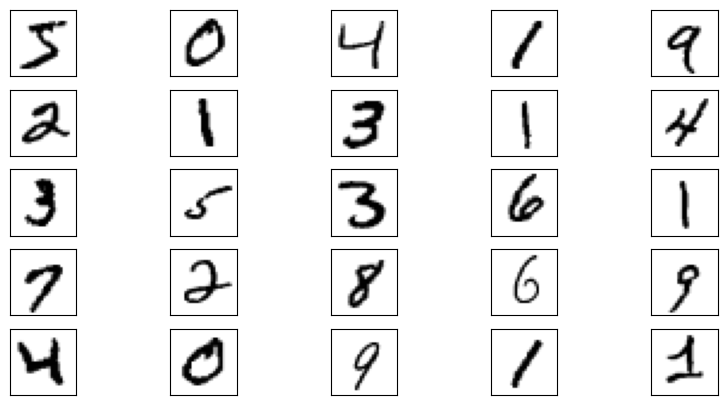

In [4]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [13]:
# Формирование самой нейронной сети. Создание, собственно, копии объекта, которую далее будем обучать

archType = 1  # Тип архитектуры для нейронной сети: 0 - простейшая полносвязная, 1 - сверточная

if(archType == 0): #Полносвязная
  model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), #преообразуем изображение 28х28 в вектор из 784 элементов
    Dense(128, activation="relu"), #слой, связывающий все 784 выхода прошлого слоя со всеми 128 своими нейронами с функцией активации relu (линейной)
    Dense(10, activation="softmax") #слой, связывающий 128 нейронов прошлого слоя с выходными 10 нейронами текущего с функцией активации softmax (так как нам необходимо получить вероятность)
  ])
elif(archType == 1): #Сверточная
  model = keras.Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)), #устанавливаем 32 фильтра сверточного типа с ядром 3 на 3. Так как первый слой, указываем input_shape
    MaxPooling2D(pool_size=(2,2), strides=2), #укрупняем масштаб полученных признаков, выбирая в матрице 2 на 2 самые высокие значения
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'), #увеличиваем количество фильтров
    MaxPooling2D(pool_size=(2,2), strides=2), # также масштабируем признаки
    Flatten(), #вытягиваем полученный тензор в вектор
    Dense(128, activation="relu"), #слой, связывающий все выходы прошлого слоя со всеми 128 своими нейронами с функцией активации relu (линейной)
    Dense(10, activation="softmax") #слой, связывающий 128 нейронов прошлого слоя с выходными 10 нейронами текущего с функцией активации softmax (так как нам необходимо получить вероятность)
  ])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [14]:
# Компиляция модели. Ее инициализация и задание начальных весов

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Обучение нейронной сети, у которой каждые 32 изображения корректируются весовые значения. 
# Выборка разбивается на обучающую (80%) и валидирующую (20%). Разбиение выборки необходимо для отслеживания и предупреждения переобучения нейронной сети

if(archType == 1):
  #Для сверточной нейронной сети вместо тензора формы (количество батчей, строки, столбцы)
  #Нужно подать на вход тензор формы (количество батчей, строки, столбцы, цветовые каналы изображения)
  #Поэтому с помощью функции numpy добавляем еще одно измерение после имеющихся трех (0,1,2), в котором описываем, что канал у нас 1, тк чб изображение
  x_train = np.expand_dims(x_train, axis=3) 
  x_test = np.expand_dims(x_test, axis=3)

model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1442 - accuracy: 0.9553 - val_loss: 0.0539 - val_accuracy: 0.9837
Epoch 2/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0402 - val_accuracy: 0.9884
Epoch 3/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.0384 - val_accuracy: 0.9891
Epoch 4/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0416 - val_accuracy: 0.9887
Epoch 5/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.0407 - val_accuracy: 0.9886


In [16]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9878


[0.037299979478120804, 0.9878000020980835]

In [17]:
#Сохранение модели для распознавания рукописных цифр

if(archType == 0):
  model.save("num_predict_model_fullyConnected.h5")
elif(archType == 1):
  model.save("num_predict_model_Convolutional.h5")

c:\Users\Denis\OneDrive\Рабочий стол\Очумелые ручки\python\.python-learning\DeepLearning\deep\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model = keras.models.load_model('num_predict_model.h5')

if(archType == 0):
  model = keras.models.load_model("num_predict_model_fullyConnected.h5")
elif(archType == 1):
  model = keras.models.load_model("num_predict_model_Convolutional.h5")

1/1 [==============================] - 0s 24ms/step
[[9.9999917e-01 2.5980554e-10 2.1850017e-09 1.0701176e-09 1.3488770e-10
  2.4846274e-08 7.5380865e-07 1.2726407e-07 2.4438824e-08 8.9709795e-09]]
Распознанная цифра: 0
(28, 28, 1, 1)


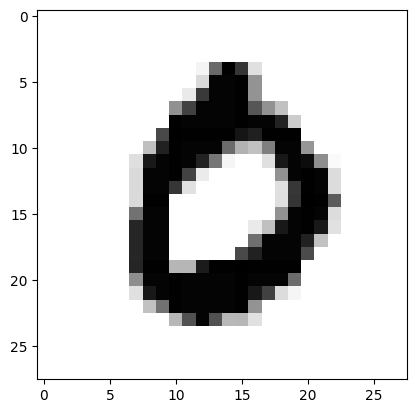

In [27]:
# Проверка распознавания цифры из тестовой выборки

n = 3
x = np.expand_dims(x_test[n], axis=0)

res = model.predict(x)

print( res )
print( f"Распознанная цифра: {np.argmax(res)}" )


print(x_test[n].shape)

if(archType == 0):
  plt.imshow(x_test[n], cmap=plt.cm.binary)
elif(archType == 1):
  plt.imshow(np.squeeze(x_test[n], axis=3), cmap=plt.cm.binary)
plt.show()

In [28]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 3ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [29]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)


[ True  True  True  True  True  True  True  True  True  True]
(122, 28, 28, 1, 1)


Значение сети: 5


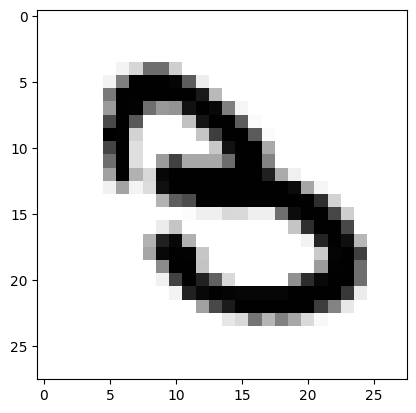

Значение сети: 4


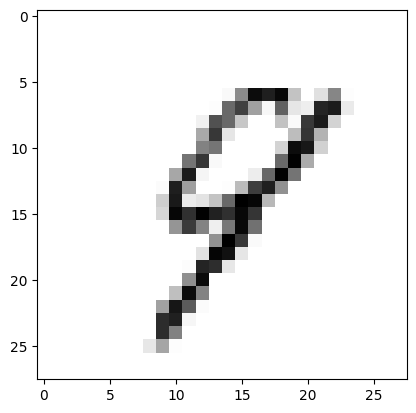

Значение сети: 7


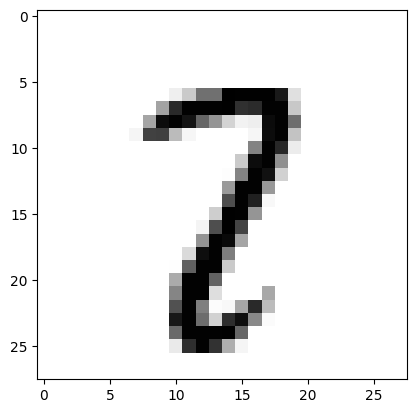

Значение сети: 0


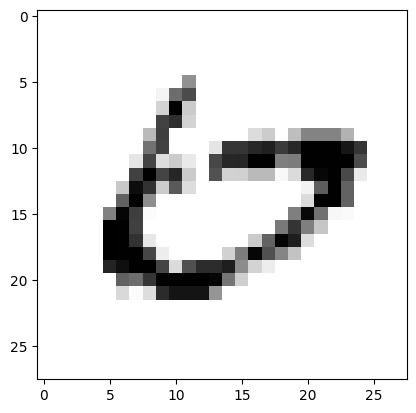

Значение сети: 5


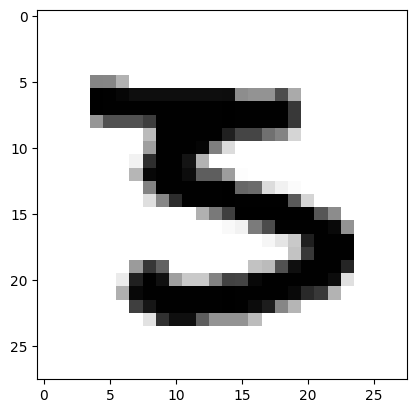

In [34]:
for i in range(5):
  print("Значение сети: " + str(p_false[i]))
  if(archType == 0):
    plt.imshow(x_false[i], cmap=plt.cm.binary)
  elif(archType == 1):
    plt.imshow(np.squeeze(x_false[i], axis=3), cmap=plt.cm.binary)
  
  
  plt.show()

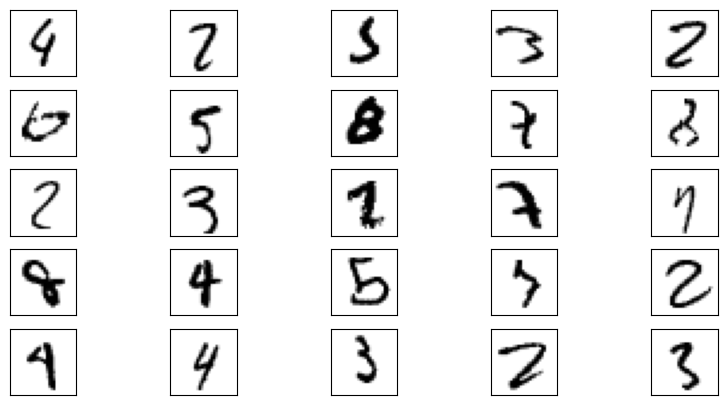

In [45]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()